## 딥러닝 영상처리
# 신경망

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 신경망 계산방법

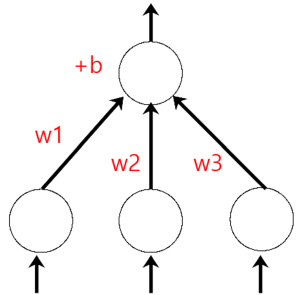

In [15]:
X = np.array([[1,0,1], [1,1,0], [1,-1,1], [1,1,1], [1,2,1]])
X

array([[ 1,  0,  1],
       [ 1,  1,  0],
       [ 1, -1,  1],
       [ 1,  1,  1],
       [ 1,  2,  1]])

In [16]:
W = np.array([1,1,-1])
W

array([ 1,  1, -1])

In [8]:
X*W

array([[ 1,  0, -1],
       [ 1,  1,  0],
       [ 1, -1, -1],
       [ 1,  1, -1],
       [ 1,  2, -1]])

In [9]:
(X*W).sum(axis=1)

array([ 0,  2, -1,  1,  2])

In [10]:
### 행렬식 적용
X@W

array([ 0,  2, -1,  1,  2])

In [11]:
X@(W.reshape(3,1))

array([[ 0],
       [ 2],
       [-1],
       [ 1],
       [ 2]])

In [17]:
### 절편값 적용
b= 0.1

X@W + b

array([ 0.1,  2.1, -0.9,  1.1,  2.1])

### 아이리스 선형회귀

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X = iris.data[:, :3]
y = iris.data[:, 3]
X.shape, y.shape

((150, 3), (150,))

In [15]:
W = np.random.randn(3)
b = np.random.randn()
W.shape

(3,)

In [16]:
W

array([ 0.92087561, -0.38389786,  1.597491  ])

In [17]:
pred_y = X@W + b
pred_y

array([ 4.7986138 ,  4.8063876 ,  4.38568381,  4.65148424,  4.66813645,
        5.40056463,  4.37656578,  4.90466512,  4.38433959,  4.92774692,
        5.15784601,  4.8802391 ,  4.71430004,  3.77461494,  4.93177959,
        5.16538019,  4.76156823,  4.7986138 ,  5.7152171 ,  4.84319354,
        5.59251356,  4.88158332,  3.66078981,  5.35464067,  5.3594864 ,
        5.21797336,  5.06441422,  5.05045046,  4.92909114,  4.86493111,
        4.99540846,  5.27301536,  4.82011174,  4.89823554,  4.92774692,
        4.50219739,  5.00721494,  4.57604889,  4.1862007 ,  4.99675268,
        4.54677713,  4.54701676,  4.10942113,  5.02602444,  5.48218994,
        4.71430004,  5.00294264,  4.45334535,  5.06575844,  4.78330581,
       11.93516711, 11.06314355, 12.20096754,  9.78111807, 11.46853935,
       10.57208977, 11.2521644 ,  8.07195922, 11.52223713,  9.19154715,
        8.63710413, 10.20023802, 10.27994566, 11.22154842,  9.00387052,
       11.21804691, 10.40322264, 10.06357071, 11.26286628,  9.63

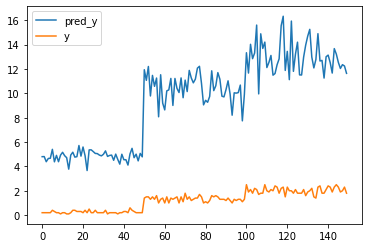

In [18]:
plt.plot(pred_y)
plt.plot(y)
plt.legend(['pred_y', 'y'])

### 오차값 계산
- MSE (Mean Squared Error)

In [19]:
mse = (((y - pred_y)**2).sum())/150
#mse = ((y - pred_y)**2).mean()
mse

75.66739074066041

### 가중치 변경

In [20]:
W1 = W.copy()
W1[0] += 0.01
W1

array([ 0.93087561, -0.38389786,  1.597491  ])

In [21]:
pred_y = X@W1 + b
((y - pred_y)**2).mean()

76.67464418527636

In [22]:
W2 = W.copy()
W2[0] -= 0.01
W2

array([ 0.91087561, -0.38389786,  1.597491  ])

In [23]:
pred_y = X@W2 + b
((y - pred_y)**2).mean()

74.66710242937779

### 중간층 추가시 계산
- 노드 2개인 중간층 추가

In [50]:
W1 = np.random.randn(3,2)
W2 = np.random.randn(2,1)
b1 = np.random.randn(2)
b2 = np.random.randn()
display(W1, W2, b1, b2)

array([[ 1.0394955 ,  0.54257454],
       [-0.15192403, -0.04716975],
       [-0.09680683, -0.82901443]])

array([[0.80945136],
       [1.49228806]])

array([0.22595788, 1.09351419])

-1.1518511351055862

In [51]:
y1 = X@W1 + b1
y1

array([[ 4.86012129e+00,  2.53493002e+00],
       [ 4.72818421e+00,  2.44999998e+00],
       [ 4.49958098e+00,  2.41495257e+00],
       [ 4.39146247e+00,  2.19960920e+00],
       [ 4.74097934e+00,  2.47595559e+00],
       [ 5.08215829e+00,  2.43013015e+00],
       [ 4.35556595e+00,  2.26835972e+00],
       [ 4.76168346e+00,  2.40248809e+00],
       [ 4.22362886e+00,  2.18342969e+00],
       [ 4.70331112e+00,  2.36238157e+00],
       [ 5.13190446e+00,  2.60536699e+00],
       [ 4.54410368e+00,  2.21107174e+00],
       [ 4.62423466e+00,  2.39574253e+00],
       [ 4.13352895e+00,  2.37315959e+00],
       [ 5.53116750e+00,  3.05695021e+00],
       [ 5.33740629e+00,  2.73512052e+00],
       [ 5.12088102e+00,  2.76173592e+00],
       [ 4.86012129e+00,  2.53493002e+00],
       [ 5.40919934e+00,  2.59761949e+00],
       [ 4.80486340e+00,  2.43787765e+00],
       [ 5.15812030e+00,  2.45371502e+00],
       [ 4.82005581e+00,  2.44259462e+00],
       [ 4.36390387e+00,  2.59053154e+00],
       [ 4.

In [52]:
y1.shape

(150, 2)

In [56]:
pred_y = y1@W2 + b
pred_y

array([[8.11573701],
       [7.88220028],
       [7.64485625],
       [7.23598524],
       [7.93129055],
       [8.13907356],
       [7.30952432],
       [7.83841487],
       [7.0759876 ],
       [7.73131481],
       [8.4408445 ],
       [7.37664628],
       [7.71709042],
       [7.28618777],
       [9.43792076],
       [8.80081789],
       [8.66526906],
       [8.11573701],
       [8.65373972],
       [7.92617834],
       [8.23575654],
       [7.94551494],
       [7.79704664],
       [7.75976357],
       [6.98199966],
       [7.78421238],
       [7.706866  ],
       [8.14929799],
       [8.30018346],
       [7.25020962],
       [7.43465607],
       [8.49885429],
       [8.03327841],
       [8.64082025],
       [7.73131481],
       [8.27173469],
       [8.90772531],
       [7.7661807 ],
       [7.18819988],
       [8.00352473],
       [8.08217603],
       [7.48866591],
       [7.14952668],
       [7.6875294 ],
       [7.39998284],
       [7.71709042],
       [7.79462946],
       [7.348

In [57]:
pred_y.shape

(150, 1)

In [58]:
mse = ((y - pred_y.ravel())**2).mean()
mse

30.095389406552314